# Phase 3 Project

- Student name: GROUP 7
- Student pace: Part Time
- Scheduled project review date/time: 19th July 2023
- Instructor name: William Okomba

# Project Overview

SyriaTel, a leading telecommunications company, faces the challenge of customer churn. To minimize financial losses and secure the company's future, this project aims to develop a classification model that predicts customer churn by uncovering patterns and factors associated with it. The company can therefore take proactive measures based on these insights to retain customers and ensure sustained growth.

# Business Problem

SyriaTel Telecommunications is a company dedicated to connecting people through seamless communication. In their relentless pursuit of excellence, they have encountered a challenge of customer churn. Each lost connection not only signifying a departure but also posing a threat to the company's financial growth and future. By understanding factors and patterns associated with it and developing a classification model that predicts customer churn effectively, SyriaTel can take targeted actions to prevent churn and ensure business continuity.

# Project Objectives

- To build a robust predictive model using the provided dataset to classify customers as churned or not churned.
- To identify any discernible patterns or trends associated with customer churn. 
- To provide actionable insights to SyriaTel to take proactive measures to retain customers once the model is developed.
- To evaluate the model performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. 

# Getting Started...

In [1]:
#Importing the relevant libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report #plot_confusion_matrix
#from imblearn.over_sampling import SMOTE, ADASYN
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data and viewing the first five rows

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Understanding

Exploring the data to get a glimpse of:

- Shape of the data
- The column names
- The data types
- Statistical summary of the data
- Missing values
- The duplicates

In [3]:
# Shape of the data
df.shape

(3333, 21)

In [4]:
# An overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# A view of the columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
#Checking for missing values in our dataset
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
# A statistical summary of the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Data description report

- The dataset contains 21 columns and 3333 rows. This means there are 21 different variables each with 3333 records.
- The dataset consists of four main data types; float, integer, bool and object.
- There are no missing values.
- There are no duplicated rows in this dataset.
- A statistical summary of our dataset indicates...

# Data Preparation

**Feature Engineering**

We created two new features: 'call_rates_day' and 'call_rates_night' to represent the ratio of the total day charges to the total day minutes and  the ratio of the total night charges to the total night minutes respectively. This would help us determine if the charges incurred during day and night calls might be contributing factors to customer churn.

In [9]:
df['call_rates_day'] = df['total day charge']/ df['total day minutes']
df['call_rates_night'] = df['total night charge']/ df['total night minutes']
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_rates_day,call_rates_night
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,0.170011,0.044994
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,0.169988,0.045008
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,0.170008,0.045018
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,0.170007,0.044997
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,0.170006,0.044997


In [10]:
# Rechecking for null values in our modified dataset
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
call_rates_day            2
call_rates_night          0
dtype: int64

In [11]:
# Dropping null values
df = df.dropna()

We dropped the missing values because 2 missing values was a low number and would not have a large effect on the dataset.

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Variables

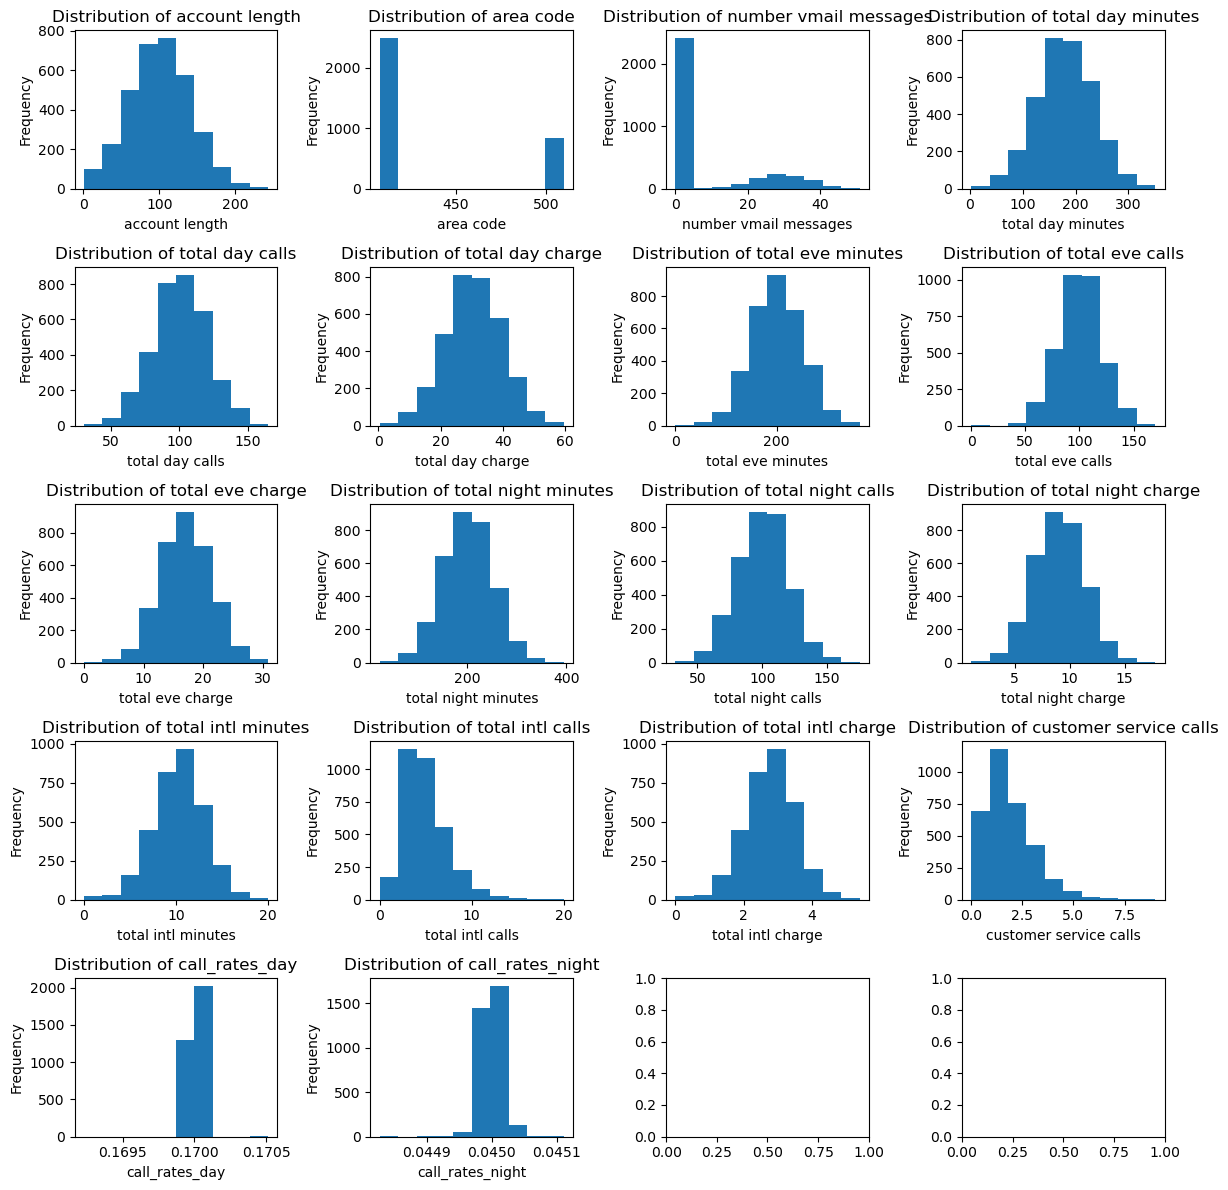

In [12]:
# Plotting histograms to visualize features' distribution

# Select numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Set the number of rows and columns for the subplots
num_rows = 5
num_cols = 4

# Set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Plot histograms for each numerical variable
for i, var in enumerate(numerical_vars):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(df[var], bins=10)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title('Distribution of ' + var)

plt.tight_layout()
plt.show()

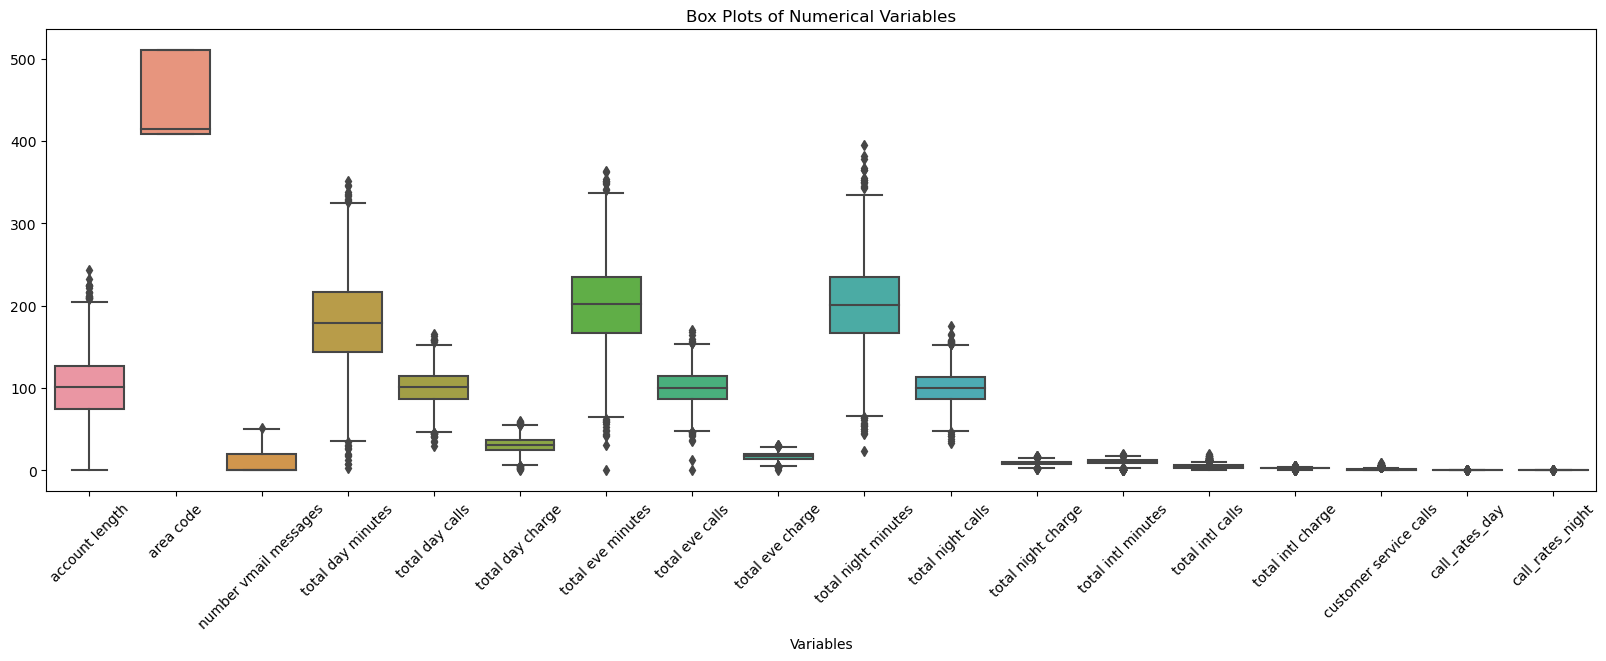

In [13]:
# Plotting boxplots to check for outliers

# Select numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot box plots for each numerical variable
sns.boxplot(data=df[numerical_vars])

# Set the title and labels
plt.title('Box Plots of Numerical Variables')
plt.xlabel('Variables')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [14]:
# A statistical view to confirm the outliers plotted above
min_max_summary = df.agg(['min', 'max'])
min_max_summary

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_rates_day,call_rates_night
min,AK,1,408,327-1058,no,no,0,2.6,30,0.44,...,23.2,33,1.04,0.0,0,0.0,0,False,0.169231,0.044828
max,WY,243,510,422-9964,yes,yes,51,350.8,165,59.64,...,395.0,175,17.77,20.0,20,5.4,9,True,0.170513,0.045111


**For the numerical variables, univariate analysis, we plotted histograms to provide insights into the frequency distribution of our features** We noticed that most features in our dataset such as 'account length', 'total day minutes', 'total day calls', 'total day charge' and others had a somewhat normal distribution  while 'customer service calls' and 'total intl calls' were positively skewed.

**We also plotted box plots to check for outliers in our features** in which we found most of our features to exhibit a range of extreme values. These values represented the range of variability in the data for each corresponding feature. **While this range of variablity could be considered as outliers, we deemed them admissible since they accurately reflected real-world scenarios in the telecommunications context.** 

### Categorical Variables

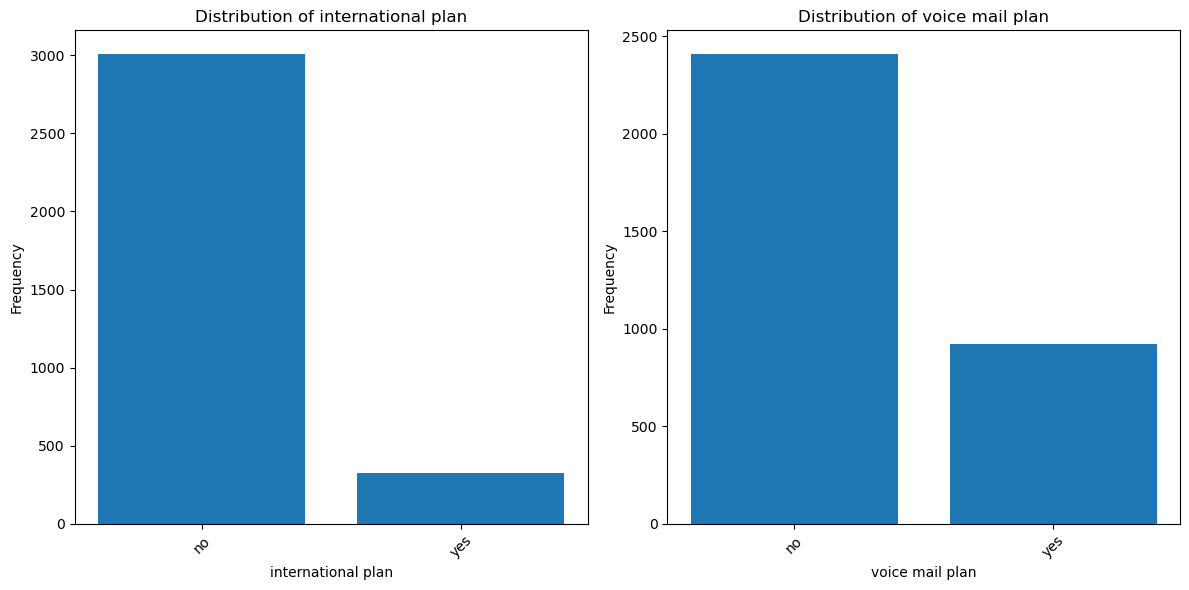

In [15]:
# Bar plots for categorical variables to show their distributions

# Select categorical columns excluding 'state' and 'phone number'
categorical_vars = df.select_dtypes(include=['object']).columns.drop(['state', 'phone number'])

# Set the number of rows and columns for the subplots
num_rows = 1
num_cols = len(categorical_vars)

# Set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Plot bar plots for each categorical variable
for i, var in enumerate(categorical_vars):
    axes[i].bar(df[var].value_counts().index, df[var].value_counts())
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Distribution of ' + var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

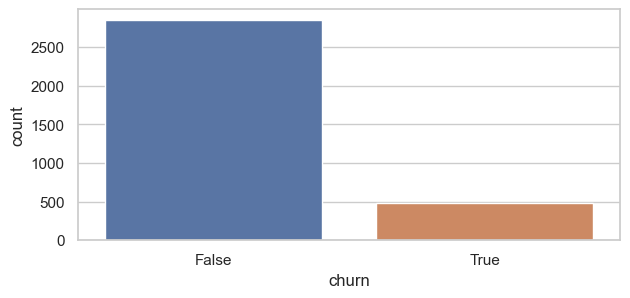

In [16]:
# Bar plots for the target variable
sns.set_theme(style="whitegrid")
plt.figure(figsize =(7,3))
sns.countplot(data=df, x='churn');

**For the categorical variables, univariate analysis,** we plotted bar plots to get a sense of the distribution of our categorical data. The bar plots suggest only a minority of the customers are on the international plan and the voice mail plan with only a few customers having these plans. It will be interesting to gain insights on how this is a contributing factor to customer churn.

**For our target feature 'churn', our visualization indicates the presence of class imbalance** because it shows a significant difference between the false and true class with false being the majority.

## Bivariate Analysis

### Numerical Variables

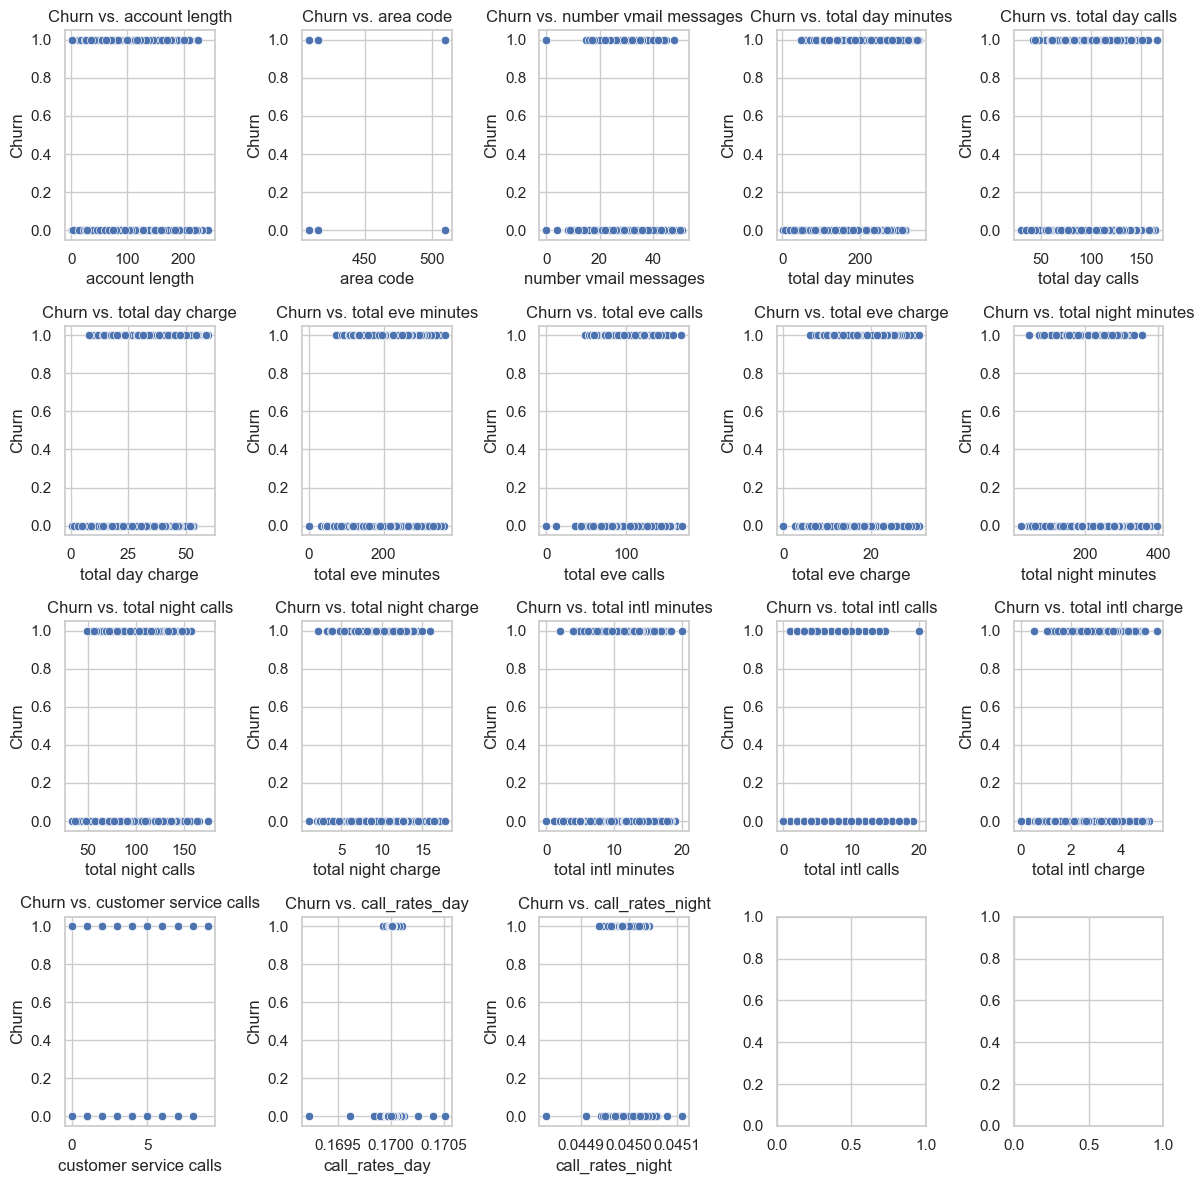

In [17]:
# Plotting Scatter Plots to show the relationship between churn and the numerical variables

# Select numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Set the number of rows and columns for the subplots
num_rows = 4
num_cols = -(-len(numerical_vars) // num_rows)  # Ceiling division to ensure enough subplots

# Set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Plot scatter plots for each numerical variable against other numerical variables
for i, var in enumerate(numerical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=var, y='churn', data=df, ax=axes[row, col])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Churn')
    axes[row, col].set_title('Churn vs. ' + var)

plt.tight_layout()
plt.show()

**For our numerical variables, Bivariate analyisis, we plotted scatter plots** to visualize the relationship between the numerical variables against customer churn. **According to our plots, the relationship is non linear making a classification model most appropriate for this dataset** to help make predictions and discover underlying patterns and relationships in the data.

### Categorical Variables

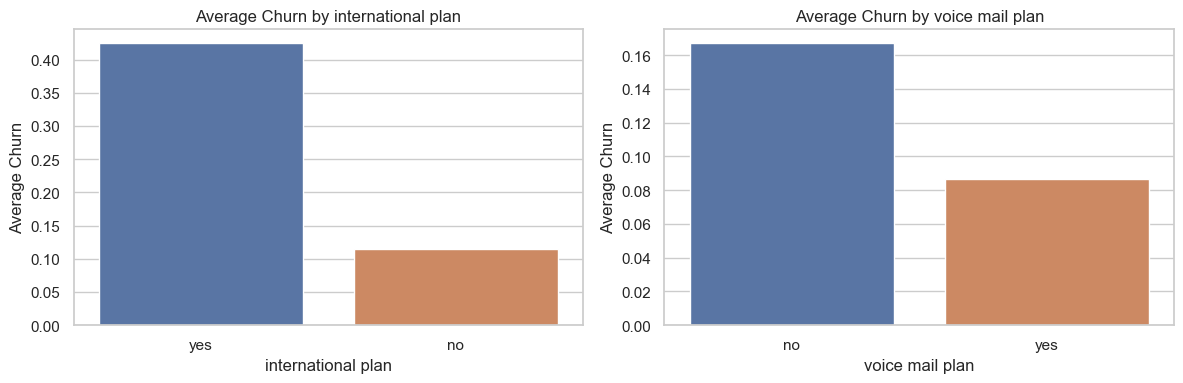

In [18]:
# Bar plots to show relationship of categoricals and churn

# Define the columns
columns = ['international plan', 'voice mail plan']

# Create bar plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Generate bar plots for each column
for i, column in enumerate(columns):
    grouped_data = df.groupby(column)['churn'].mean().sort_values(ascending=False)
    sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Churn')
    axes[i].set_title(f'Average Churn by {column}')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

**For our categorical variables, Bivariate analyisis,** the bar plots represent the relationship between the categorical variables "international plan" and "voicemail plan" against customer churn, helping us understand how these variables are related to the likelihood of customer churn.

Our visualization indicates customers with an international plan have a higher churn rate to those without, while customers with no voice mail plan tend to have a higher churn rate to those with a plan.

## Multivariate Analysis

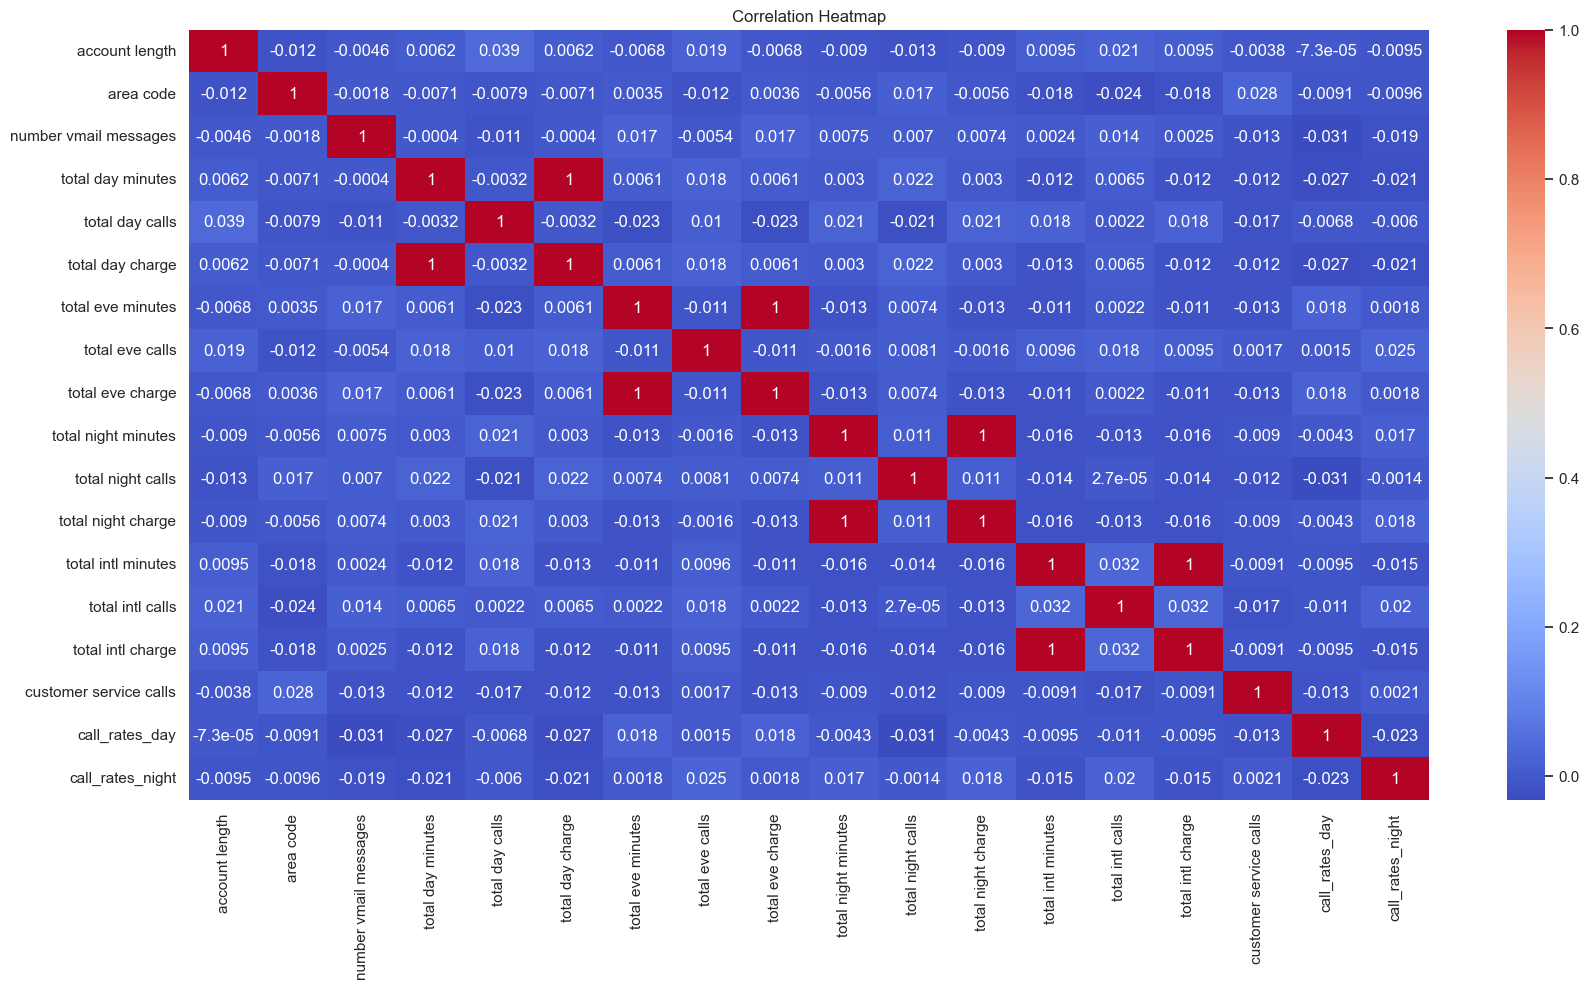

In [19]:
# Select numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_vars].corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and display
plt.title('Correlation Heatmap')
plt.show()

The heatmap above shows the correlation coefficients between pairs of numerical variables in our dataset. The red labels represent high values in correlation between our variables which is an indication of the presence of multicollinearity.

### Multicollinearity check

In [20]:
# Checking for multicollinearity

df_enhanced = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_enhanced['pairs'] = list(zip(df_enhanced.level_0, df_enhanced.level_1))

# set index to pairs
df_enhanced.set_index(['pairs'], inplace = True)

#drop level columns
df_enhanced.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_enhanced.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_enhanced.drop_duplicates(inplace=True)

In [21]:
df_enhanced[(df_enhanced.cc>.5) & (df_enhanced.cc <1)] #  checking for features that have a high multicolineaity of above  0.5

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993


As per our heatmap visualization, we confirmed there were four pairs, as per the above output, that were highly correlated. We decided to drop one feature from each pair to help address multicollinearity.

In [22]:
df_modified = df.drop(['total day charge', 'total eve minutes','total night charge', 'total intl minutes'], axis=1)
df_modified.shape

(3331, 19)

# Modelling

**To begin modelling we performed the following steps:**

- Assigned the 'churn' column to `y` 
- Dropped the 'churn', 'phone number' and 'state' columns from `df`, and assign the resulting DataFrame to `X`
- Performed one-hot encoding on the categorical features.
- Split `X` and `y` into training and test sets, assigned 20% to the test set and set the `random_state` to 42
- **Recall will be our main performance evaluation metric** because our project objective is to help SyriaTel Telecommunications identify as many churned customers as possible to gain insights into the reasons for churn.  Recall evaluation metric will ensure that a higher proportion of actual churned customers are correctly identified, allowing for a more comprehensive analysis of their characteristics and behaviors.

In [23]:
# Defining the features (X) and target variable (y)
X = df_modified.drop(['churn', 'phone number', 'state'], axis=1)
y = df_modified['churn']

# Performing one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total eve calls,total eve charge,total night minutes,total night calls,total intl calls,total intl charge,customer service calls,call_rates_day,call_rates_night,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,99,16.78,244.7,91,3,2.70,1,0.170011,0.044994,0,1
1,107,415,26,161.6,123,103,16.62,254.4,103,3,3.70,1,0.169988,0.045008,0,1
2,137,415,0,243.4,114,110,10.30,162.6,104,5,3.29,0,0.170008,0.045018,0,0
3,84,408,0,299.4,71,88,5.26,196.9,89,7,1.78,2,0.170007,0.044997,1,0
4,75,415,0,166.7,113,122,12.61,186.9,121,3,2.73,3,0.170006,0.044997,1,0


 **Performing a train test split**

In [24]:
# Performing train-test split with stratification to maintain the class distribution in the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (2664, 16) (2664,)
Test set shape: (667, 16) (667,)


**Feature Scaling**

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN Model

### Baseline KNN Model

In [26]:
# KNN classifier
baseline_knn = KNeighborsClassifier()
baseline_knn.fit(X_train_scaled, y_train)

# Cross Validation on our baseline model
knn_cv_scores = cross_val_score(baseline_knn, X_train_scaled, y_train, cv=5, scoring= 'recall').mean()
print("knn_cv_scores:", knn_cv_scores)

# Evaluating the baseline KNN classifier
y_pred_knn = baseline_knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print("\nKNN Classifier:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)

# Plotting a confunsion matrix
#plot_confusion_matrix(baseline_knn, X_train_scaled, y_train)

knn_cv_scores: nan


AttributeError: 'NoneType' object has no attribute 'split'

For the baseline KNN Classisfier model:

- A recall of 0.3176 means that approximately 31.8% of the actual churned customers are correctly identified by the baseline model as churned. This is fairly close to the cross validation recall score of 23.65% meaning the model has the ability to generalize unseen data.

- An accuracy of 0.9040 suggests 90.4% of the predictions made by the model on the test set are correct while a precision of 0.8182 suggests 81.8% of the customers predicted as churned by the baseline model are actually churned customers.

- The F1-score being a harmonic mean of precision and recall, considers both false positives and false negatives. In this case, the F1-score of 0.4576 indicates the baseline model's performance is moderate, taking into account both precision and recall.

- Overall, the KNN model's performance in predicting churn is somewhat limited. It has a relatively high accuracy but lower precision, recall, and F1-score. This suggests that while the model may accurately identify non-churned customers, it struggles to capture churned customers effectively. It might not be the best model for this dataset.

## KNN Model Improvement
### Hyperparameter Tuning

In [27]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_enhanced = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_enhanced, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_scaled, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


### Evaluating the Improved KNN Model Performance

In [28]:
# Evaluating the improved KNN classifier
y_pred_knn = best_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print("\nKNN Classifier:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)


# Plotting a confunsion matrix
plot_confusion_matrix(best_model, X_train_scaled, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

Even after hyperparameter tuning, Recall being our main performace metric is still low at 0.4235. These means out of all actual churned customers, this model can only predict 42.35% as churned. **Overall, the KNN model's performance in predicting churn is somewhat limited.** The model struggles to capture churned customers effectively, meaning it may not be the preferred classification model for this project.

## Logistic Regression
### Baseline Logistic Regression Model

In [30]:
# Instantiating and fitting a LogisticRegression with random_state=42
baseline_logreg = LogisticRegression(random_state=42)
baseline_logreg.fit(X_train_scaled, y_train)

# Cross Validation on our baseline model
logreg_cv_scores = cross_val_score(baseline_logreg, X_train_scaled, y_train, cv=5, scoring= 'recall').mean()
print("logreg_cv_scores:", logreg_cv_scores)

# Evaluating the baseline logistic regression model
y_pred_baseline = baseline_logreg.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline)
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)
print("\nBaseline Logistic Regression Mode:")
print("Accuracy:", baseline_accuracy)
print("Precision:", baseline_precision)
print("Recall:", baseline_recall)
print("F1-score:", baseline_f1)

# Plotting a confunsion matrix
#plot_confusion_matrix(baseline_logreg, X_train_scaled, y_train)

logreg_cv_scores: 0.2114873417721519

Baseline Logistic Regression Mode:
Accuracy: 0.8800599700149925
Precision: 0.5757575757575758
Recall: 0.2235294117647059
F1-score: 0.3220338983050848


For the Logistic Regression baseline model:

- A recall of 0.2235 means that approximately 22.35% of the actual churned customers are correctly identified by the baseline model as churned. Against, the cross validation recall score of 0.2114, the model indicates great ability to generalize to new, unseen data.
- An accuracy of 0.8801 suggests 88.01% of the predictions made by the model on the test set are correct and a precision of 0.5758 suggests 57.58% of the customers predicted as churned by the baseline model are actually churned customers.
- The F1-score being a harmonic mean of precision and recall, considers both false positives and false negatives. In this case, the F1-score of 0.322 indicates the baseline model's performance is below average, taking into account both precision and recall.
- Improvements can be made by further optimizing the model to better handle class imbalance and regularization to help capture churn patterns more accurately.

## Logistic Regression Model Improvement
### Hyperparameter Tuning

In [38]:
# Define hyperparameters to tune
penalty = ['l1', 'l2',]
C = [0.001, 0.01, 0.1, 1, 10, 100]

# Define class weights to handle class imbalance
class_weights = [{0: 1, 1: w} for w in [1, 2, 3, 4, 5]]

# Create hyperparameter grid
hyperparameters = dict(penalty=penalty, C=C, class_weight=class_weights)

# Create a new Logistic Regression model
logreg_enhanced = LogisticRegression(random_state=42)

# Use GridSearchCV to find the best hyperparameters
clf = GridSearchCV(logreg_enhanced, hyperparameters, cv=5, scoring='recall')
best_model = clf.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Penalty:", best_model.best_estimator_.get_params()['penalty'])
print("Best C:", best_model.best_estimator_.get_params()['C'])
print("Best Class Weight:", best_model.best_estimator_.get_params()['class_weight'])

Best Penalty: l2
Best C: 1
Best Class Weight: {0: 1, 1: 5}


### Evaluating the Improved Logistic Regression Model Performance

In [32]:
# Evaluating the improved Logistic Regression classifier
# Get the best model from GridSearchCV
best_logreg = best_model.best_estimator_

# Predict on the test set
y_pred_improved = best_logreg.predict(X_test_scaled)

# Calculate evaluation metrics
improved_accuracy = accuracy_score(y_test, y_pred_improved)
improved_precision = precision_score(y_test, y_pred_improved)
improved_recall = recall_score(y_test, y_pred_improved)
improved_f1 = f1_score(y_test, y_pred_improved)

print("Improved Logistic Regression Model:")
print("Accuracy:", improved_accuracy)
print("Precision:", improved_precision)
print("Recall:", improved_recall)
print("F1-score:", improved_f1)

# Plot the confusion matrix
plot_confusion_matrix(best_logreg, X_train_scaled, y_train)

Improved Logistic Regression Model:
Accuracy: 0.7871064467766117
Precision: 0.34759358288770054
Recall: 0.7647058823529411
F1-score: 0.4779411764705882


NameError: name 'plot_confusion_matrix' is not defined

LogisticRegression(C=1e+20, fit_intercept=False)
AUC for None: 0.8449565393167576
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight='balanced', fit_intercept=False)
AUC for Balanced: 0.8419243986254296
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 2}, fit_intercept=False)
AUC for 2 to 1: 0.8447948251465535
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 10}, fit_intercept=False)
AUC for 10 to 1: 0.8401253284819082
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 100}, fit_intercept=False)
AUC for 100 to 1: 0.8312310491206792
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weig

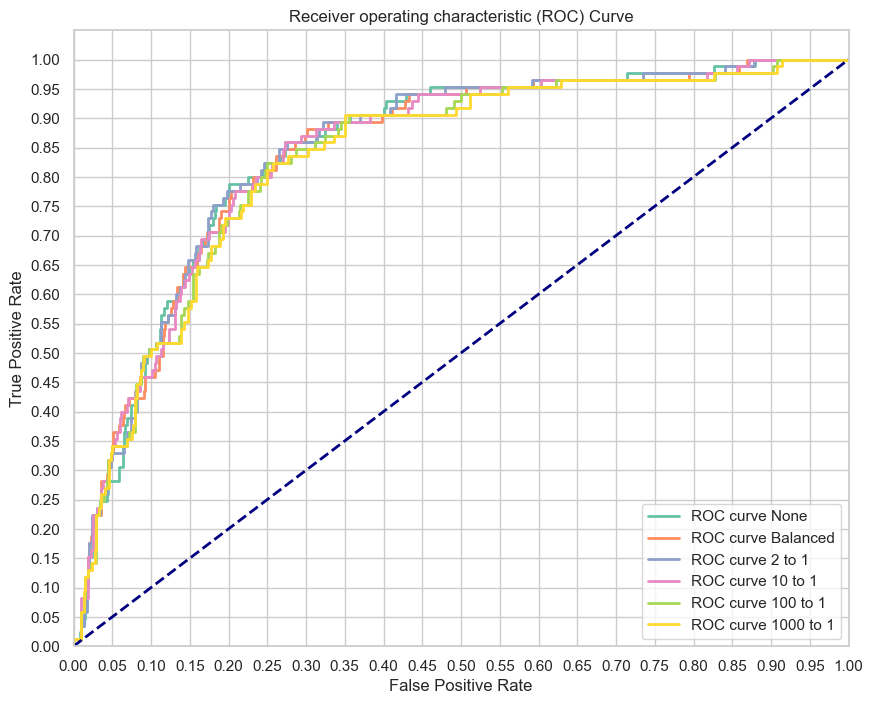

In [39]:
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train_scaled, y_train)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test_scaled)

    y_score = logreg.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

By addressing class imbalance and accounting for regularization, the recall performance metric has greatly improve from 0.2235 to 0.7647. This means out of all actual churned customers, this model can predicted upto 76.5% as churned.

## DecisionTreeClassifier
### Baseline Decision Tree

In [33]:
# Decision Tree classifier
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train_scaled, y_train)

# Evaluating the Decision Tree classifier
y_pred_dt = baseline_dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("\nDecision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)


Decision Tree Classifier:
Accuracy: 0.9175412293853074
Precision: 0.6744186046511628
Recall: 0.6823529411764706
F1-score: 0.6783625730994152


In [ ]:
# Plotting a confunsion matrix
plot_confusion_matrix(baseline_knn, X_train_scaled, y_train)

For the Decision Tree classifier:
- A recall 0.6824 suggests that of all actually churned customers, the model correctly identifies approximately 68.24% of them as churned. This is the best recall metric of all our baseline models so far and we will threfore strive to improve the model further to capture churn patterns even more accurately.
- An accuracy of 0.9175 means that the model predicts the correct churn status for approximately 91.75% of the instances in the test set. A precision of 0.6744 also indicates that out of all the instances predicted as churn, approximately 67.44% are churned customers.
- The F1-score being the harmonic mean of precision and recall, a score of 0.6784, indicates a good balance between precision and recall.

### Model Enhancement

### Hyperparameter Tuning: Max_depth

#Optimal value of 5

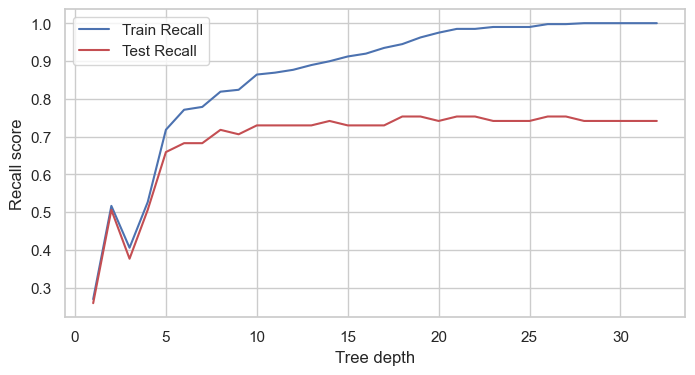

In [47]:
from sklearn.metrics import recall_score
max_depths = list(range(1, 33))

# Initializing empty arrays to store the training and test recall scores
train_results = []
test_results = []

# Loop over different max_depth values
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_pred = dt.predict(X_train_scaled)
    train_recall = recall_score(y_train, train_pred)
    
    # Add recall score to previous train results
    train_results.append(train_recall)
    
    y_pred = dt.predict(X_test_scaled)
    test_recall = recall_score(y_test, y_pred)
    
    # Add recall score to previous test results
    test_results.append(test_recall)

plt.figure(figsize=(8, 4))
plt.plot(max_depths, train_results, 'b', label='Train Recall')
plt.plot(max_depths, test_results, 'r', label='Test Recall')
plt.ylabel('Recall score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


### Optimizing  Min_samples Split

In [54]:
from sklearn.metrics import recall_score
import numpy as np

max_depth = 10  # Set the desired max_depth

min_samples_splits = list(range(2, 33))

# Initializing empty arrays to store the training and test recall scores
train_results = []
test_results = []

# Loop over different min_samples_split values
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_pred = dt.predict(X_train_scaled)
    train_recall = recall_score(y_train, train_pred)

    # Add recall score to previous train results
    train_results.append(train_recall)

    y_pred = dt.predict(X_test_scaled)
    test_recall = recall_score(y_test, y_pred)

    # Add recall score to previous test results
    test_results.append(test_recall)

# Find the index of the maximum test recall
optimal_index = np.argmax(test_results)

# Retrieve the corresponding min_samples_split value
optimal_min_samples_split = min_samples_splits[optimal_index]

print("Optimal min_samples_split:", optimal_min_samples_split)


Optimal min_samples_split: 2


In [57]:
from sklearn.metrics import recall_score
import numpy as np

max_depths = list(range(1, 33))
min_samples_split = 2  # Set the desired min_samples_split

# Initializing empty arrays to store the training and test recall scores
train_results = []
test_results = []

# Loop over different max_depth values
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_pred = dt.predict(X_train_scaled)
    train_recall = recall_score(y_train, train_pred)

    # Add recall score to previous train results
    train_results.append(train_recall)

    y_pred = dt.predict(X_test_scaled)
    test_recall = recall_score(y_test, y_pred)

    # Add recall score to previous test results
    test_results.append(test_recall)

# Find the index of the maximum test recall
optimal_index = np.argmax(test_results)

# Retrieve the corresponding max_depth value
optimal_max_depth = max_depths[optimal_index]

print("Optimal max_depth:", optimal_max_depth)


Optimal max_depth: 18


In [58]:
from sklearn.metrics import recall_score
import numpy as np

max_depth = 18 # Set the desired max_depth
min_samples_split = 2 # Set the desired min_samples_split

max_features_values = list(range(1, X_train_scaled.shape[1] + 1))  # Range of max_features values

# Initializing empty arrays to store the training and test recall scores
train_results = []
test_results = []

# Loop over different max_features values
for max_features in max_features_values:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split,
                                max_features=max_features, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_pred = dt.predict(X_train_scaled)
    train_recall = recall_score(y_train, train_pred)

    # Add recall score to previous train results
    train_results.append(train_recall)

    y_pred = dt.predict(X_test_scaled)
    test_recall = recall_score(y_test, y_pred)

    # Add recall score to previous test results
    test_results.append(test_recall)

# Find the index of the maximum test recall
optimal_index = np.argmax(test_results)

# Retrieve the corresponding max_features value
optimal_max_features = max_features_values[optimal_index]

print("Optimal max_features:", optimal_max_features)


Optimal max_features: 15
